# Migration Flows to Europe
---
---


  **Baris Alan**

Final Data Science Tutorial

CMPS 6160 - Introduction to Data Science

Assist. Prof. Saad Hassan


[Online Access to the Project](https://barisalan00.github.io/)

[For Project Datasets](https://github.com/barisalan00/barisalan00.github.io)

---

## Project Topic and Goals

The advanced liberal democracies in the Western world stand as an attractive destination of migration for populations in the developing world, driven by a myriad of pull and push factors. Pull factors encompass liberal developed democracies offering employment opportunities, and providing rule of law and equal treatment before the law. Conversely, push factors comprise issues such as armed and social conflict, unemployment, poverty, corruption, poor governance, and the climate related risks. European countries, in particular, emerge as a desirable destination for numerous nations in Africa, the Middle East, and West Asia.

The primary objective of this project is to conduct a comprehensive analysis and visualization of migration flows to the European Union (EU) countries from regions outside Europe. The key areas of focus include examining the demographic structure and educational background of migrants, identifying their countries of origin and the EU countries they choose for settlement, and mapping out the migration routes and transit countries they navigate.

By addressing these aspects, the project aims to provide valuable insights into the dynamics of migration to the EU, shedding light on the factors influencing migration patterns and contributing to a nuanced understanding of the complex interplay between push and pull factors in the context of global migration.

Later on, this project aims to build a statistical model to measure the impact of various factors on migration flows to Europe: economic (GPD per capita and multidimensional poverty), political (political stability and effectiveness of government), conflict (armed conflict and social unrest),  climate (climate related risks), and population.

## Project Dataset
This project will utilize various datasets from different institutions.

The primary dataset is sourced from [Eurostat](https://ec.europa.eu/eurostat), the official statistical administration of the EU. Specifically, I obtained the dataset from the [Migration and Population Statistics](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Migration_and_migrant_population_statistics) section, focusing on [immigration by age group, sex, and citizenship](https://ec.europa.eu/eurostat/databrowser/view/migr_imm1ctz__custom_10260387/default/table?lang=en). This dataset provides the total number of migrants based on specified filters, allowing researchers to analyze immigration by receiving country, immigrant citizenship, year, age group, and gender.

Due to Eurostat's data download limitations, careful selection of attributes was necessary. Specifically, (1) I narrowed down the country of citizenship options to 218, excluding EU and non-EU European countries to focus on immigration from other regions to Europe. Additionally, regional groupings such as Africa and South Asia were included for future analysis. (2) Receiving countries were limited to 27 EU nations. (3) Gender analysis was conducted for all available options (Male-Female-Total). (4) Age-based analysis was performed by selecting total and specific age brackets. (5) The dataset was filtered for the year 2021, with plans to include data from previous years for a comprehensive analysis of changing migration flows.

Key questions addressed with the first dataset include: "What is the total number of arrivals in EU countries in 2022?", "What are the demographic characteristics of immigrants based on gender and age?", and "Which EU countries received the highest number of immigrants?", and lastly "Which sent the highest number of immigrants?"

To measure the effect of economic indicators, this project will utilize the GDP per capita (Purchasing Power Parity in 2017 Constant USD) dataset by the [World Bank](https://databank.worldbank.org/home). GPD/PC is the most common and one of the best indicator of overall economic wellbeing of a country.

Yet, because the average income might not reflect the well-being of the whole population, this research will include [World Bank Multidimensional Poverty Measurement](https://www.worldbank.org/en/topic/poverty/brief/multidimensional-poverty-measure) as well.

Thirdly, [World Bank World Governance Indicator](https://www.worldbank.org/en/publication/worldwide-governance-indicators) will be used to government effectiveness and political conditions on migration flows.

To evaluate the effect of armed and social conflict, [ACLED (Armed Conflict Location and Event Datasets](https://acleddata.com/dashboard/#/dashboard) will be used.


[German Watch Climate Risk Index](https://www.germanwatch.org/en/cri) will be used to asses climate-realted factors.

And [CIA Population Dataset](https://www.cia.gov/the-world-factbook/about/archives/2022/field/population/country-comparison) will be used to retrieve the population information of countries.

Lastly, two datasets will be utilized to import 2- and 3-digit country codes. Thus [Datahub.io](https://datahub.io/core/country-list) dataset was utilized. This dataset serves the sole purpose of associating country names with citizenship and receiving country codes in the immigration dataset. Some of the independent variable datasets use 3-digit country codes. Therefore, for better merging the main migration dataset with these independent variable datasets, the [UN ISO3 Dataset](https://data.apps.fao.org/catalog/dataset/iso-3-code-list-global-region-country/resource/f1b4b92d-8abd-43be-bea3-c0dc7f82ccf9) was utilized to bring iso3 codes.

The ultimate goal of this project is to build a statistical model to predict the migration flows to EU27 countries by using various economic, social, political, environmental and gender-related factors.

## ETL (Extract, Transform, Load)

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Clone the repository, change the wd
%cd /content
!rm -rf barisalan00.github.io  # Remove the existing directory
!git clone https://github.com/barisalan00/barisalan00.github.io
%cd /content/barisalan00.github.io


/content
Cloning into 'barisalan00.github.io'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 70 (delta 9), reused 2 (delta 2), pack-reused 52
Receiving objects: 100% (70/70), 13.96 MiB | 6.07 MiB/s, done.
Resolving deltas: 100% (23/23), done.
/content/barisalan00.github.io


### Import Datasets

In [ ]:
# Main Immigration Dataset: Import Eurostat Immigration/2022 Dataset
euim22 = pd.read_csv('/content/barisalan00.github.io/Eurostat-2022Migration-migr_imm1ctz__custom_10841676_linear.csv')
display(euim22.head(3))

# Total number of observations: 119479
display(len(euim22))

# Import Datahub.io 2-digit Country Codes dataset
country_codes2 = pd.read_csv('Datahub-CountryCodes-data_csv.csv')
display(country_codes2.head(3))

# Import UN 3-digit Country Codes dataset
country_codes3 = pd.read_csv('UN-iso3.csv')
display(country_codes3.head(3))

# Economic Indicator1: WB 2022 GDP/PC
gdppc = pd.read_csv('WB-2022GDPPC-Const.csv')
display(gdppc.head(3))

# Economic Indicator2: WB 2023 Multidimensional Poverty Measure
mpm = pd.read_excel('WB-2023MPM-Data-AM2023.xlsx')
display(mpm.head(3))

# Conflict Indicator1: ACLED 2022 Battles Dataset
battle = pd.read_csv('ACLED-2022Battles.csv')
display(battle.head(3))

# Conflict Indicator2: ACLED 2022 Riots Dataset
riot = pd.read_csv('ACLED-2022Riots.csv')
display(riot.head(3))

# Conflict Indicator3: ACLED 2022 Violence Dataset
violence = pd.read_csv('ACLED-2022ViolencesCivilians.csv')
display(violence.head(3))

# Political Indicators: WB Governance Indicators
govern = pd.read_csv('WB-2022GovIndic.csv')
display(govern.head(3))

# Climate Indicator: German Watch Climate Risk Index
climate = pd.read_csv('GermanWatch-2018CRI.csv')
display(climate.head(3))

# Population Indicator: CIA World Factbook - Population
population = pd.read_csv('CIA-Population.csv', encoding='latin1')
display(population.head(3))


,DATAFLOW,LAST UPDATE,freq,citizen,agedef,age,unit,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:MIGR_IMM1CTZ(1.0),27/03/24 11:00:00,A,AD,REACH,TOTAL,NR,F,AT,2022,0,NaN
1,ESTAT:MIGR_IMM1CTZ(1.0),27/03/24 11:00:00,A,AD,REACH,TOTAL,NR,F,BG,2022,0,NaN
2,ESTAT:MIGR_IMM1CTZ(1.0),27/03/24 11:00:00,A,AD,REACH,TOTAL,NR,F,CZ,2022,0,NaN


119479

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL


,iso3,name
0,BEL,Belgium
1,CH_,"China, mainland"
2,GGY,Guernsey


,Country Name,Country Code,Series Name,Series Code,2022 [YR2022]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,..
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,3566.269439
2,Africa Western and Central,AFW,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,4066.48323


,Region,Country code,Economy,Reporting year,Survey name,Survey year,Survey coverage,Welfare type,Survey comparability,Monetary (%),Educational attainment (%),Educational enrollment (%),Electricity (%),Sanitation (%),Drinking water (%),Multidimensional poverty headcount ratio (%)
0,ECA,ALB,Albania,2018,HBS,2018,N,c,3.0,0.048107,0.192380,-,0.06025,6.579772,9.594966,0.293161
1,SSA,AGO,Angola,2018,IDREA,2018,N,c,2.0,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
2,LAC,ARG,Argentina,2021,EPHC-S2,2021,U,i,2.0,0.958847,1.085320,0.731351,0,0.193965,0.364048,0.971202


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,DRC27768,31 December 2022,2022,1,Political violence,Battles,Armed clash,M23: March 23 Movement,NaN,2,...,Karenga,-1.4724,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,NaN,1673291085
1,MZM3154,31 December 2022,2022,1,Political violence,Battles,Armed clash,Islamist Militia (Mozambique),NaN,3,...,Namacule,-11.8567,39.8000,1,AIM; Pinnacle News; Twitter; Zitamar,New media-National,"On 31 December 2022, Islamist militia clashed ...",2,NaN,1673291088
2,MZM3155,31 December 2022,2022,1,Political violence,Battles,Armed clash,Islamist Militia (Mozambique),NaN,3,...,Namande,-11.8278,39.7416,1,AIM; Pinnacle News; Twitter; VOA; Zitamar,New media-National,"On 31 December 2022, Islamist militia clashed ...",2,NaN,1673291088


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,KEN9717,31 December 2022,2022,1,Political violence,Riots,Mob violence,Rioters (Kenya),Vigilante Group (Kenya),5,...,Kutus,-0.5753,37.3269,2,Kenya Standard; NTV (Kenya),New media-National,"On 31 December 2022, a mob lynched a man, part...",1,crowd size=no report,1673291087
1,BRA62473,31 December 2022,2022,1,Political violence,Riots,Mob violence,Rioters (Brazil),Vigilante Group (Brazil),5,...,Maues,-3.3795,-57.7196,1,Portal do Holanda,Subnational,"On 31 December 2022, in Maues (Amazonas), a su...",0,crowd size=no report,1673295343
2,BRA62488,31 December 2022,2022,1,Political violence,Riots,Mob violence,Rioters (Brazil),PL: Liberal Party,5,...,Catalao,-18.1670,-47.9448,1,Estado de Minas,National,"Property destruction: On 31 December 2022, in ...",0,crowd size=no report,1673295343


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,DRC27766,31 December 2022,2022,1,Political violence,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,Banyamulenge Ethnic Militia (Democratic Republ...,4,...,Mikenge,-3.4497,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,NaN,1673291085
1,SAF18067,31 December 2022,2022,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (South Africa),NaN,3,...,Johannesburg,-26.2023,28.0436,1,Zambia Reports,International,"On 31 December 2022, unknown suspects shot and...",1,NaN,1673291088
2,SOM38915,31 December 2022,2022,1,Political violence,Violence against civilians,Abduction/forced disappearance,Al Shabaab,NaN,2,...,Ted,4.4000,43.9167,2,Undisclosed Source,Local partner-Other,"On 31 December 2022, Al Shabaab abducted three...",0,NaN,1673291088


,Country Name,Country Code,Series Name,Series Code,2022 [YR2022]
0,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.EST,-2.550801754
1,Afghanistan,AFG,Voice and Accountability: Estimate,VA.EST,-1.751587272
2,"Korea, Dem. People's Rep.",PRK,Voice and Accountability: Percentile Rank,VA.PER.RNK,0


,CRI\rRank,Country,CRI\rscore,Fatalities\rin 2018\r(Rank),Fatalities per\r100 000 inhab-\ritants (Rank),Losses in mil-\rlion US$ (PPP)\r(Rank),Losses per\runit GDP in\r% (Rank)
0,1,Japan,5.50,2,2,3,12
1,2,Philippines,11.17,4,14,7,14
2,3,Germany,13.83,3,1,6,36


,name,slug,value,date_of_information,ranking,region
0,Afghanistan,afghanistan,"38,346,720",2022 est.,37.0,South Asia
1,Albania,albania,"3,095,344",2022 est.,136.0,Europe
2,Algeria,algeria,"44,178,884",2022 est.,34.0,Africa


### Transform and Tidy Data

In [ ]:
# Check the dtypes for euim_22: The year and flow columns are integer, and the rest is object as expected.
euim22.dtypes

DATAFLOW       object
LAST UPDATE    object
freq           object
citizen        object
agedef         object
age            object
unit           object
sex            object
geo            object
TIME_PERIOD     int64
OBS_VALUE       int64
OBS_FLAG       object
dtype: object

In [ ]:
# Keep only necessary columns and drop redundant ones
euim22 = euim22[['citizen', 'age', 'sex', 'geo', 'TIME_PERIOD', 'OBS_VALUE']]
euim22.head(3)

,citizen,age,sex,geo,TIME_PERIOD,OBS_VALUE
0,AD,TOTAL,F,AT,2022,0
1,AD,TOTAL,F,BG,2022,0
2,AD,TOTAL,F,CZ,2022,0


In [ ]:
# Rename colums for readability
euim22.rename(columns={'citizen':'Migrant_Citizenship',
                        'age': 'Age',
                        'sex': 'Gender',
                        'geo':'Receiving_CCode',
                        'TIME_PERIOD':'Year',
                        'OBS_VALUE':'Flow'},inplace=True)
euim22.head(3)

,Migrant_Citizenship,Age,Gender,Receiving_CCode,Year,Flow
0,AD,TOTAL,F,AT,2022,0
1,AD,TOTAL,F,BG,2022,0
2,AD,TOTAL,F,CZ,2022,0



---
Despite the Eurostat data dashboard displaying country names for the country codes, the downloaded dataset does not include country names. Consequently, I will leverage the "country_codes" dataset from datahub.io to retrieve country names for both Citizenship and Receiving_CCode codes. This step ensures a comprehensive and accurate representation of country names in the analysis.

In [ ]:
# Bring country name information for Migrant Citizenship column (left join to keep all observations at euim_22)
euim22 = pd.merge(euim22, country_codes2, left_on='Migrant_Citizenship', right_on='Code', how='left')

# Drop the redundant "Code" column
euim22.drop('Code', axis=1, inplace=True)

# Rename the 'Name' column to 'Sending_Country'
euim22.rename(columns={'Name':'Sending_Country'}, inplace=True)

# Move Migrant_Country after Migrant_Citizenship
col = euim22.pop('Sending_Country')
euim22.insert(1, col.name, col)


euim22.head(3)

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Year,Flow
0,AD,Andorra,TOTAL,F,AT,2022,0
1,AD,Andorra,TOTAL,F,BG,2022,0
2,AD,Andorra,TOTAL,F,CZ,2022,0


In [ ]:
# Bring country name information for Receiving Country Column (left join to keep all observations at euim_22)
euim22 = pd.merge(euim22, country_codes2, left_on='Receiving_CCode', right_on='Code', how='left')

# Drop the redundant "Code" column
euim22.drop('Code', axis=1, inplace=True)

# Rename the 'Name' column to 'Receiving_Country'
euim22.rename(columns={'Name':'Receiving_Country'}, inplace=True)

# Move Receiving_Country after Receiv_CCode
col = euim22.pop('Receiving_Country')
euim22.insert(5, col.name, col)


euim22.head(3)

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
0,AD,Andorra,TOTAL,F,AT,Austria,2022,0
1,AD,Andorra,TOTAL,F,BG,Bulgaria,2022,0
2,AD,Andorra,TOTAL,F,CZ,Czech Republic,2022,0


In [ ]:
# Check if we lost any cells at the merge operations: nothing missing
len(euim22)

119479

Do we have any missing values under Receiving_Country? 'EL' and 'EU27_2020' codes have missing values under Receiving_Country column. 'EL'  is country code for Greece. Greece is using both 'GR' (in international system) and 'EL' (in European system) as its country code.'EU27_2020' is the code for 27 EU countries.

In [ ]:
# Missing values under Receiving_Country:
euim22[euim22['Receiving_Country'].isna()]

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
21798,CC8_22_FOR,NaN,TOTAL,F,EL,NaN,2022,18332
21800,CC8_22_FOR,NaN,TOTAL,F,EU27_2020,NaN,2022,1406470
21830,CC8_22_FOR,NaN,TOTAL,M,EL,NaN,2022,10646
21832,CC8_22_FOR,NaN,TOTAL,M,EU27_2020,NaN,2022,952353
21862,CC8_22_FOR,NaN,TOTAL,T,EL,NaN,2022,28978
21864,CC8_22_FOR,NaN,TOTAL,T,EU27_2020,NaN,2022,2358823
34623,EFTA_FOR,NaN,TOTAL,F,EL,NaN,2022,66
34625,EFTA_FOR,NaN,TOTAL,F,EU27_2020,NaN,2022,11082
34655,EFTA_FOR,NaN,TOTAL,M,EL,NaN,2022,63
34657,EFTA_FOR,NaN,TOTAL,M,EU27_2020,NaN,2022,10916


In [ ]:
# Fill these NaN values for 'EL' with Greece
euim22.loc[euim22['Receiving_CCode'] == 'EL', 'Receiving_Country'] = 'Greece'
euim22.loc[euim22['Receiving_CCode'] == 'EU27_2020', 'Receiving_Country'] = 'EU27'

euim22[(euim22['Receiving_CCode']=='EL') | (euim22['Receiving_CCode']=='EU27_2020')].head(5)


,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
21798,CC8_22_FOR,NaN,TOTAL,F,EL,Greece,2022,18332
21800,CC8_22_FOR,NaN,TOTAL,F,EU27_2020,EU27,2022,1406470
21830,CC8_22_FOR,NaN,TOTAL,M,EL,Greece,2022,10646
21832,CC8_22_FOR,NaN,TOTAL,M,EU27_2020,EU27,2022,952353
21862,CC8_22_FOR,NaN,TOTAL,T,EL,Greece,2022,28978


Eurostat datasets usually involve EFTA (European Free Trade Association) countries (Iceland, Liechstein, Norway, and Switzerland). Since our focus is on the EU countries, we need to remove these 4 countries.

In [ ]:
# Are all receiving countries EU27? Iceland, Liechstein, Norway, Switzerland are not EU27.
display(euim22['Receiving_Country'].unique())


array(['Austria', 'Bulgaria', 'Czech Republic', 'Estonia', 'Finland',
       'Croatia', 'Hungary', 'Iceland', 'Italy', 'Lithuania',
       'Luxembourg', 'Latvia', 'Netherlands', 'Norway', 'Romania',
       'Sweden', 'Slovenia', 'Slovakia', 'Spain', 'France', 'Belgium',
       'Switzerland', 'Cyprus', 'Germany', 'Denmark', 'Greece', 'EU27',
       'Ireland', 'Liechtenstein', 'Malta', 'Poland', 'Portugal'],
      dtype=object)

In [ ]:
# Drop these 4 countries: Now we have 27 EU countries + 1 EU27 Aggregated observation
countries_to_drop = countries_to_drop = ['Iceland', 'Liechtenstein', 'Norway', 'Switzerland']
euim22 = euim22[~euim22['Receiving_Country'].isin(countries_to_drop)]
eu27 = (euim22['Receiving_Country'].unique())
print(eu27)

['Austria' 'Bulgaria' 'Czech Republic' 'Estonia' 'Finland' 'Croatia'
 'Hungary' 'Italy' 'Lithuania' 'Luxembourg' 'Latvia' 'Netherlands'
 'Romania' 'Sweden' 'Slovenia' 'Slovakia' 'Spain' 'France' 'Belgium'
 'Cyprus' 'Germany' 'Denmark' 'Greece' 'EU27' 'Ireland' 'Malta' 'Poland'
 'Portugal']


What about missing observations under Sending_Country column?

The missing values under the "Sending_Country" column correspond to the codes displayed in the array below. Notably, these codes are not 2-digit but rather 3-digit and longer.
As per the Eurostat system, most of these codes represent continents such as 'AFR'=Africa, 'ASI_W'=West Asia, which aggregate the sum of countries within these continents. The immigrant numbers for continents may introduce duplicates.
Additionally, specific codes represent regions such as 'AU_NZ': Australia-New Zealand, 'CC8_22_FOR':8 Candidate Countries, 'CZ_SK': Czechoslovakia, 'EFTA_FOR':European Free Trade Association Countries, 'EL':Greece, 'EU27_2020_FOR':EU27 Countries except reporting country,'EUR':Europe, 'EX_SU':Soviet Union, 'EX_Yu':Yugoslavia, 'FOR_STLS':Foreign country and stateless, 'NAT': Reporting Country, 'NEU27_2020_FOR':Non-EU27 countries nor reporting country, Oceania, 'RNC': Recognized Non-Citizens, 'RS_ME':Serbia and Montenegro, 'STLS': Stateless, 'TOTAL': Total, 'UNK': Unknown, 'XK':Kosovo.
For analytical purposes, all continents and regional observations will be excluded from the primary analysis.
However, 'STLS': Stateless, 'RNC': Recognized Non-Citizens, 'UNK': Unknown will be retained in the original dataset, as these observations are not represented under any country-observations and can be treated as distinct entities. 'EU27_2020_FOR', 'NEU27_2020_FOR', and 'TOTAL' will also kept in the dataset for calculation/comparison purposes.

In [ ]:
# Is there any NaN cells under Sending_Country column? --> 20017 observations are missing.
euim22['Sending_Country'].isna().sum()

20017

In [ ]:
# Let's check the unique values for these 14451 NaN observations.
euim22[euim22['Sending_Country'].isna()]['Migrant_Citizenship'].unique()

array(['AFR', 'AFR_C', 'AFR_E', 'AFR_N', 'AFR_S', 'AFR_W', 'AME', 'AME_C',
       'AME_N', 'AME_S', 'ASI', 'ASI_C', 'ASI_E', 'ASI_S', 'ASI_S_E',
       'ASI_W', 'AU_NZ', 'CC8_22_FOR', 'CRB', 'CZ_SK', 'EFTA_FOR', 'EL',
       'EU27_2020_FOR', 'EUR', 'EX_SU', 'EX_YU', 'FOR_STLS', 'MEL', 'MIC',
       'NAT', 'NEU27_2020_FOR', 'OCE', 'POL', 'RNC', 'RS_ME', 'STLS',
       'TOTAL', 'UK', 'UNK', 'XK'], dtype=object)

In [ ]:
# Replace the NaN Values under Migrant_Country for these ('STLS':Stateless, 'RNC':Recognized Non-Citizens and 'UNK':Unknown) under Migrant_Ciizenship
# Therefore all non-NaN observatoins under Migrant_Country column are part of our analysis.
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'STLS'].index, 'Sending_Country'] = 'Stateless'
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'RNC'].index, 'Sending_Country'] = 'Recognized Non-Citizens'
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'UNK'].index, 'Sending_Country'] = 'Unkown'
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'EU27_2020_FOR'].index, 'Sending_Country'] = 'EU27'
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'NEU27_2020_FOR'].index, 'Sending_Country'] = 'Non-EU27'
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'TOTAL'].index, 'Sending_Country'] = 'Total'
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'EL'].index, 'Sending_Country'] = 'Greece'


# How many missing values now: 15129
display(euim22['Sending_Country'].isna().sum())

15129

In [ ]:
# Delete the continent observations from the euim22 (which are NA observations under Sending_Country column)
euim22 = euim22.dropna(subset=['Sending_Country'])

# NEw dataframe is 93370 length.
len(euim22)

93370

In [ ]:
#Some re-naming of 'TOTAL' observations under 'Age' and 'Migrant_Citizenship' olumns  for easier coding
euim22.loc[euim22[euim22['Age'] == 'TOTAL'].index, 'Age'] = 'T'
euim22.loc[euim22[euim22['Migrant_Citizenship'] == 'TOTAL'].index, 'Migrant_Citizenship'] = 'Total'

## Basic Summary Statistics

**How many immigrants did arrive in the EU countries in 2022 from non-European countries?**

According to [Frontex (EU Border and Coast Guard Agency Security)](https://www.frontex.europa.eu/) and [Eurostat](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Migration_and_migrant_population_statistics) a total of 5.1 million immigrants entered to EU countries from non-EU countries, which is a 117% increase compared to 2021 (2.7 million).

Our dataset (code below) reveals that the total number of arrivals to EU27 countries amounts to almost 7 million individuals. Among these, 4.8 million immigrants originated from non-EU27 countries, while 1.1 million arrived from other EU27 countries or other countries in the Europe.

Germany emerges as the top destination, with a total of 2.1 million immigrants arriving, followed by Spain (1.2 million), France (430K), and Italy (410K).


In [ ]:
# Total number of immigration to EU27 from and total number of immigration from non-EU27
euim22[(euim22['Sending_Country'].apply(lambda x: x in ['Total', 'EU27', 'Non-EU27'])) & (euim22['Receiving_Country']=='EU27') & (euim22['Age']=='T') & (euim22['Gender']=='T')].sort_values(by='Flow', ascending=False)

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
106898,Total,Total,T,T,EU27_2020,EU27,2022,6977742
78980,NEU27_2020_FOR,Non-EU27,T,T,EU27_2020,EU27,2022,4777475
38564,EU27_2020_FOR,EU27,T,T,EU27_2020,EU27,2022,1098032


In [ ]:
# Total number of arrivals by EU27 countries
euim22[(euim22['Sending_Country']=='Total') & (euim22['Age']=='T') & (euim22['Gender']=='T')].sort_values(by='Flow', ascending=False).sort_values(by='Flow', ascending=False).head(5)

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
106898,Total,Total,T,T,EU27_2020,EU27,2022,6977742
106893,Total,Total,T,T,DE,Germany,2022,2071690
106897,Total,Total,T,T,ES,Spain,2022,1258894
106900,Total,Total,T,T,FR,France,2022,431017
106905,Total,Total,T,T,IT,Italy,2022,410985


In [ ]:
# Total number of arrivals from non-EU27 countries
euim22[(euim22['Sending_Country']=='Non-EU27') & (euim22['Age']=='T') & (euim22['Gender']=='T')].sort_values(by='Flow', ascending=False).sort_values(by='Flow', ascending=False).head(5)

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
78980,NEU27_2020_FOR,Non-EU27,T,T,EU27_2020,EU27,2022,4777475
78975,NEU27_2020_FOR,Non-EU27,T,T,DE,Germany,2022,1630619
78979,NEU27_2020_FOR,Non-EU27,T,T,ES,Spain,2022,925587
78974,NEU27_2020_FOR,Non-EU27,T,T,CZ,Czech Republic,2022,330997
78987,NEU27_2020_FOR,Non-EU27,T,T,IT,Italy,2022,287010


In [ ]:
# Create a new dataset by dropping the aggregate observationes('Total', 'EU27', and 'Non-EU27' observations under 'Sending_Country', and 'EU27' under 'Receiving')
# Total number of observations decreased to 90958.
immig = euim22[~euim22['Sending_Country'].isin(['Total', 'EU27', 'Non-EU27'])]
len(immig)

90958

In [ ]:
# Drop 'EU27' under 'Receiving'
# Total number of observations decreased to 90952.
immig = immig[~euim22['Receiving_Country'].isin(['EU27'])]
len(immig)

<ipython-input-17-7c0bbbe4c3bb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  immig = immig[~euim22['Receiving_Country'].isin(['EU27'])]


90952

**Crucial Note on Migration Dataset**

The Eurostat immigration dataset offers observations (TOTAL) that provide the total number of arrivals to each single EU27 coutnry and to the EU, enabling a comprehensive view of aggregate numbers. According to these observations the total arrivals to EU27 countries amount to 7 million, with 4.8 million originating from non-EU27 countries.

However, upon removing these 'Total' observations to eliminate duplicates and examining the total number of arrivals by filtering the receiving country, we find a significantly lower figure of 3.4 million total arriving migrants. Of this immigration flow, 1.1 million arrivals are from other EU27 countries, while 2.2 million are from non-EU27 countries. As cited above, total number of arrivals from non-EU27 countries is 4.8 million.

These numbers starkly contrast with aggregate observations from Frontex and Eurostat. This is primarily due to the exclusion of certain Sending_Country observations in the dataset, which means we have missing observations under Sending_Country. For instance, while aggregate data suggests Germany received a total of 2.1 million immigrants,a closer examination of arrivals to Germany by filtering the Sending_Country reveals only 6226 migrants, recorded as Stateless or Unknown, arrived in Germany.

It is evident that our dataset contains missing observations under the Sending_Country column, as exemplified by the absence of Sending_Country information for arrivals in Germany. Consequently, this dataset is limited in its ability to analyze migration flows comprehensively, particularly those from non-EU27 countries to EU27 countries.

The datasets by various organizations and projects focusing on international migration flows, including the [International Migration Organization](https://www.iom.int/data-and-research), [Global Migration Data Portal](https://www.migrationdataportal.org/international-data?i=stock_abs_&t=2020), [UN Global Migration Database](https://www.un.org/development/desa/pd/data/international-migration-flows), [OECD International Migration Database](https://stats.oecd.org/Index.aspx?DataSetCode=MIG), and [World Bank Global Bilateral Migration](https://databank.worldbank.org/source/global-bilateral-migration) and some other independent projects and academic research, were checked. However, none of these sources provide a complete dataset of bilateral migration flows. At present, the Eurostat dataset stands as the most comprehensive option. Efforts are underway to obtain a full dataset from Eurostat officials, but until then, this project will utilize the available data.

In [ ]:
# What is total number of arrivals? 3.4 million.
immig[(immig['Age']=='T') & (immig['Gender']=='T')]['Flow'].sum()

3406513

In [ ]:
# Total number of arrivals from EU27 countries: 1.1 million
immig[(immig['Sending_Country'].isin(eu27)) & (immig['Age']=='T') & (immig['Gender']=='T')]['Flow'].sum()

1171307

In [ ]:
# Total number of arrivals from non-EU27 countries: 2.2 million.
immig_noneu27 = immig[~immig['Sending_Country'].isin(eu27)]
immig_noneu27[(immig_noneu27['Age']=='T') & (immig['Gender']=='T')]['Flow'].sum()

<ipython-input-18-76402d7125d9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  immig_noneu27[(immig_noneu27['Age']=='T') & (immig['Gender']=='T')]['Flow'].sum()


2235206

In [ ]:
# Total number of arrivals in Germany from non-EU27 countries: 6226
immig_noneu27[(immig_noneu27['Receiving_Country']=='Germany') & (immig_noneu27['Age']=='T') & (immig['Gender']=='T')]['Flow'].sum()
display(immig_noneu27[immig_noneu27['Receiving_Country']=='Germany']['Sending_Country'].unique())

<ipython-input-19-85c4f28e804b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  immig_noneu27[(immig_noneu27['Receiving_Country']=='Germany') & (immig_noneu27['Age']=='T') & (immig['Gender']=='T')]['Flow'].sum()


array(['Stateless', 'Unkown'], dtype=object)

**How does the gender distribution among immigrants break down?**

It appears that the number of men and women arriving in the EU from non-EU27 countries in 2022 is almost equal. Therefore, gender is not a statistically interesting dynamic to analyze.

However, it is important to check and analyze the gender breakdown for various reasons. Some groups advocate for the inclusion of women, children, and the elderly while excluding men, while others argue that there is a labor shortage in the European labor market, making adult men crucial in filling this gap. More conservative groups express concerns about the potential impact of adult male immigrants on distorting European society. Therefore, understanding the gender and age demographics is crucial to assessing the validity of such perceived threats.

Gender
F    1142144
M    1092917
T    2235206
Name: Flow, dtype: int64


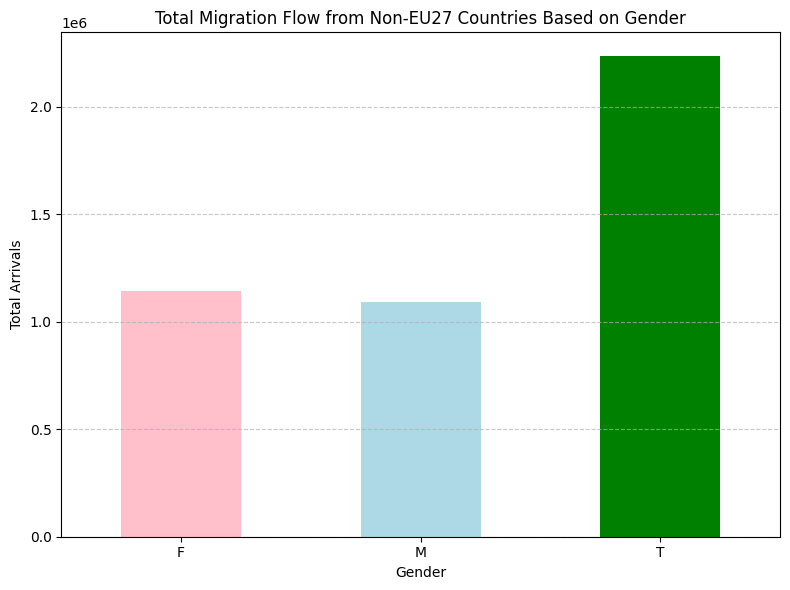

In [ ]:
# Group by 'Gender column' and sum 'Flow' column
immig_gender = immig_noneu27[(immig_noneu27['Age'] == 'T')].groupby('Gender')['Flow'].sum()
print(immig_gender)

plt.figure(figsize=(8, 6))

plot_gender = immig_gender.plot(kind='bar', color=['pink','lightblue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Total Arrivals')
plt.title('Total Migration Flow from Non-EU27 Countries Based on Gender')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**What about age demographics?**

Approximately 52% (around 1.1 million) of arriving immigrants are 34 years old or younger, with 323K falling within the age range of 15 years or younger. From the perspective of certain groups within the EU, these numbers may be perceived as a potential threat to European society. An additional observation is that as age increases, the number of immigrants arriving decreases, as depicted in the accompanying plot.

However, from a humanitarian standpoint, these figures underscore the desperation of immigrants who, in the face of civil war, economic hardships, or climate-related challenges, flee their home countries with their children, aspiring to reach Europe. Those in the age group of 20-29 are often individuals who have completed their education or recently started a family but struggle to make a living in their home countries. Frustration with poverty, corruption, and economic challenges compels them to seek better living conditions in Europe.

Once additional datasets will be incorporated into the analysis below, a clearer picture will emerge regarding the underlying reasons behind these migration patterns.

Age
TOTAL          NaN
Y_LT15    323229.0
Y15-19    145583.0
Y20-24    199836.0
Y25-29    258376.0
Y30-34    247847.0
Y35-39    212671.0
Y40-44    162976.0
Y45-49    117268.0
Y50-54     83435.0
Y55-59     56993.0
Y60-64     45407.0
Y_GE65     67215.0
Name: Flow, dtype: float64

Text(0.5, 1.0, 'Total Flow Based on Age Brackets')

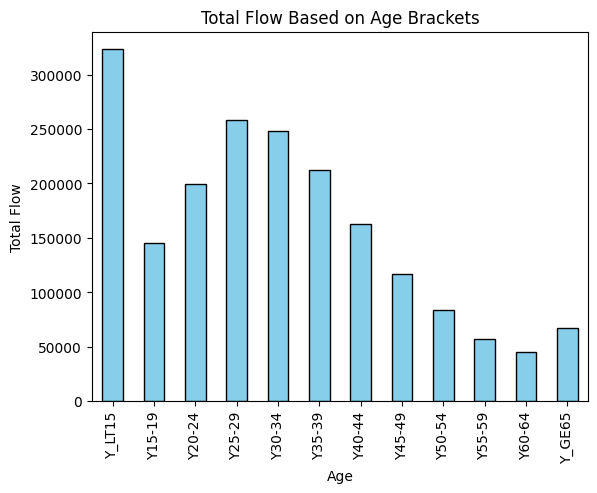

In [ ]:
# Re-arrange dataset for a better visualization
immig_age = immig_noneu27[(immig_noneu27['Gender'] == 'T')].groupby('Age')['Flow'].sum()

# Reindex the age breaks from smallest to biggest
display(immig_age.reindex(['TOTAL','Y_LT15', 'Y15-19', 'Y20-24', 'Y25-29', 'Y30-34', 'Y35-39', 'Y40-44', 'Y45-49', 'Y50-54', 'Y55-59', 'Y60-64', 'Y_GE65']))

#Plot
plot_age = immig_age.reindex(['Y_LT15', 'Y15-19', 'Y20-24', 'Y25-29', 'Y30-34', 'Y35-39', 'Y40-44', 'Y45-49', 'Y50-54', 'Y55-59', 'Y60-64', 'Y_GE65']).plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Total Flow')
plt.title('Total Flow Based on Age Brackets')

**Which EU countries did receive the highest number of immigrants?**

_Before going into the details it is worth reminding the limited nature of this dataset. As clarified above, Germany received a total number of 1.6 immigrants from non-EU27 countries, yet this dataset only represent 6226 immigrants._

Initially, both the plot and the list below indicate that Spain and Italy have received more than half of the total immigrants. This observation underscores that Africa and the Middle East remain the primary regions of origin for migrants.

Additionally, the substantial influx of immigrants into Central and Eastern EU countries is noteworthy, signifying the impact of the Invasion of Ukraine. This surge in migration patterns in these regions is a notable consequence of the geopolitical events in Ukraine.

Receiving_Country
Spain             857915
Czech Republic    330362
Italy             283740
Netherlands       189198
Austria           115919
Romania            91019
Lithuania          66139
Sweden             54356
Hungary            43601
Croatia            40073
Estonia            38898
Finland            33014
Latvia             29800
Slovenia           24269
Luxembourg         14555
Bulgaria           13885
Germany             6226
Belgium              922
Slovakia             561
Denmark              380
Ireland              297
Poland                77
France                 0
Malta                  0
Cyprus                 0
Portugal               0
Greece                 0
Name: Flow, dtype: int64


Text(0.5, 1.0, 'Total Flow Based on Receiving Country')

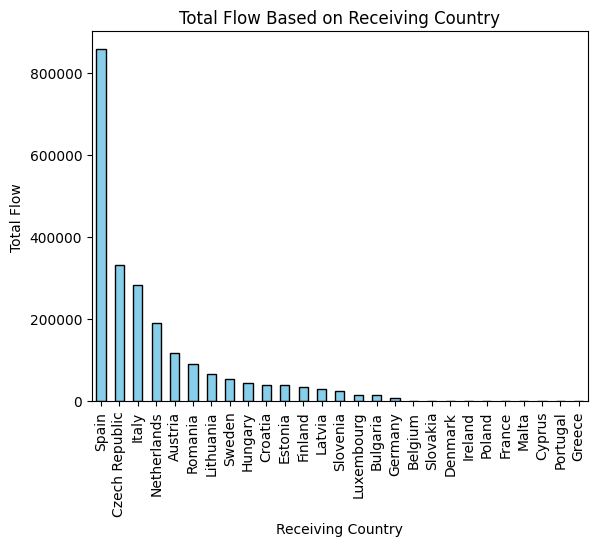

In [ ]:
# Total immigrants by receiving country
total_by_receiving = immig_noneu27[(immig_noneu27['Age'] == 'T') & (immig_noneu27['Gender'] == 'T')].groupby('Receiving_Country')['Flow'].sum()

# Sort them
total_by_receiving = total_by_receiving.sort_values(ascending=False)

print(total_by_receiving)

#Plot
total_by_receiving.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Receiving Country')
plt.ylabel('Total Flow')
plt.title('Total Flow Based on Receiving Country')


**Which countries did send the highest number of immigrants to EU countries?**

Concurrently with the aforementioned analysis, the table and plot below reveal that Ukraine, Latin American Countries, and North African Countries are the primary sources of immigration. It is not unexpected to find China and India on these lists, given that they are the two most populous countries globally.

Sending_Country
Ukraine                              764356
Colombia                             176955
Morocco                              138886
Venezuela, Bolivarian Republic of     85238
Peru                                  74722
India                                 59999
Russian Federation                    52933
Argentina                             49531
Pakistan                              42479
Syrian Arab Republic                  42466
Name: Flow, dtype: int64

Text(0.5, 1.0, 'Total Flow Based on Sending Country')

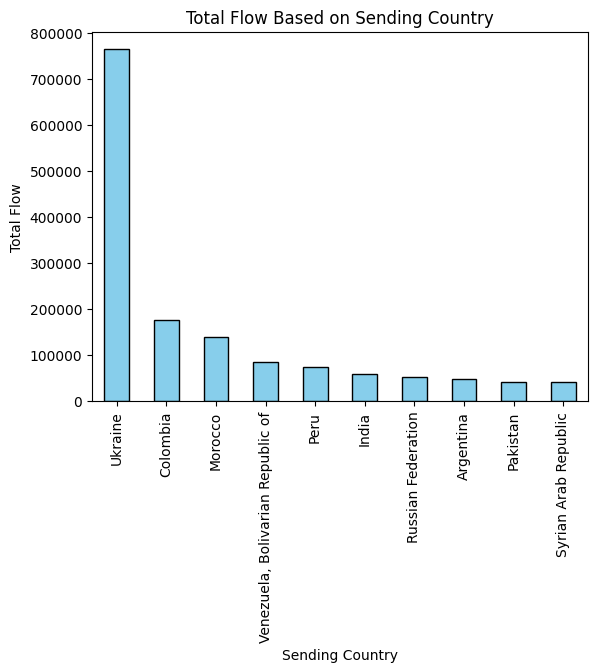

In [ ]:
# Total number of immigrants by sending country
total_by_sending = immig_noneu27[(immig_noneu27['Age'] == 'T') & (immig_noneu27['Gender'] == 'T')].groupby('Sending_Country')['Flow'].sum()
total_by_sending = total_by_sending.sort_values(ascending=False)
display(total_by_sending.head(10))

# Plot the immigrants by top- 10 sending country
total_by_sending.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Sending Country')
plt.ylabel('Total Flow')
plt.title('Total Flow Based on Sending Country')


From this point and on, we will be using the total flows, and we will not need the age and gender breaks. Therefore, will drop the Male-Female, and Age breaks and will only get the total observations for each sending country. Additionally we will have 1 observation per sending country, because from now on we will be working on the total flow to the EU. Therefore, dataset has 174 total observations.

In [ ]:
# Keep only total flows (observation 'T') and drop Male-Female observations under Gender and different age brackets under Age column.
immigration = immig_noneu27[(immig_noneu27['Age'] == 'T') & (immig_noneu27['Gender'] == 'T')]
immigration = immigration.groupby('Sending_Country')['Flow'].sum().reset_index()
display(len(immigration))
immigration.head(5)

174

,Sending_Country,Flow
0,Afghanistan,14713
1,Albania,33348
2,Algeria,15003
3,Andorra,8
4,Angola,245


## Further ETL (Before Statistical Modelling)

As clarified above, a second goal of this project is to statistically analyze the effects of various push factors, such as economic, political, conflict, and climate-related factors.

Therefore this section includes further data preprocessing, ETL (Extract-Transform-Load) and EDA (Exploratory Data Analysis) process, which will be used for statistical modelling and test.

#### Merge Immigration Dataset with Economic Indicator1: GDP/PC

World Bank GDP/PC dataset (and some other datasets for other indicator variables) has 3-digit country codes. Therefore we will import 3-digit country-codes from UN ISO dataset for Receiving and Sending Countries at our original immigration dataset.

In [ ]:
# immigration.drop(columns=['Sending_iso3', 'Sending_gdppc', 'Sending_mpm'], inplace=True)
# Merge immig_noneu27 with country_codes3
immigration = pd.merge(immigration, country_codes3[['name', 'iso3']], left_on='Sending_Country', right_on='name', how='left')
immigration.drop(columns=['name'], inplace=True)
display(immigration.head(3))

,Sending_Country,Flow,iso3
0,Afghanistan,14713,AFG
1,Albania,33348,ALB
2,Algeria,15003,DZA


In [ ]:
# Rename iso3 as Sending_iso3
immigration.rename(columns={'iso3': 'Sending_iso3'}, inplace=True)
immigration.head(3)

,Sending_Country,Flow,Sending_iso3
0,Afghanistan,14713,AFG
1,Albania,33348,ALB
2,Algeria,15003,DZA


In [ ]:
# Check for missing ISO3 codes: 9621 missing values
display(immigration['Sending_iso3'].isna().sum())

# These countries have longer and shorter version of their names.
immigration[immigration['Sending_iso3'].isna()]['Sending_Country'].unique()

20

array(['Bolivia, Plurinational State of', 'Cape Verde',
       'Congo, the Democratic Republic of the',
       'Holy See (Vatican City State)', 'Iran, Islamic Republic of',
       "Korea, Democratic People's Republic of", 'Korea, Republic of',
       'Macedonia, the Former Yugoslav Republic of',
       'Micronesia, Federated States of', 'Moldova, Republic of',
       'Palestine, State of', 'Recognized Non-Citizens', 'Stateless',
       'Swaziland', 'Taiwan, Province of China',
       'Tanzania, United Republic of', 'Turkey', 'United States',
       'Unkown', 'Venezuela, Bolivarian Republic of'], dtype=object)

In [ ]:
# Manually add the codes for these countries
missing_iso3 = {
    'Bolivia, Plurinational State of': 'BOL',
    'Congo, the Democratic Republic of the': 'COD',
    'Cape Verde': 'CPV',
    'Micronesia, Federated States of': 'FSM',
    'Iran, Islamic Republic of': 'IRN',
    "Korea, Democratic People's Republic of": 'PRK',
    'Korea, Republic of': 'KOR',
    'Moldova, Republic of': 'MDA',
    'Macedonia, the Former Yugoslav Republic of': 'MKD',
    'Palestine, State of': 'PSE',
    'Recognized Non-Citizens': 'XXX',
    'Stateless': 'XXX',
    'Swaziland': 'SWZ',
    'Turkey': 'TUR',
    'Taiwan, Province of China': 'TWN',
    'Tanzania, United Republic of': 'TZA',
    'Unkown': 'XXX',
    'United States': 'USA',
    'Holy See (Vatican City State)': 'VAT',
    'Venezuela, Bolivarian Republic of': 'VEN'
}

# Update ISO3 column in immig_noneu27 dataset using the dictionary
immigration['Sending_iso3'].fillna(immigration['Sending_Country'].map(missing_iso3), inplace=True)
display(immigration['Sending_iso3'].isna().sum()) # No more NaNs

0

In [ ]:
# Merge WB GDP/PC with Immigration Dataset and bring GDP/PC information
immigration = pd.merge(immigration, gdppc[['Country Code', '2022 [YR2022]']], left_on='Sending_iso3', right_on='Country Code', how='left')
immigration.drop(columns=['Country Code'], inplace=True)

immigration.head()

,Sending_Country,Flow,Sending_iso3,2022 [YR2022]
0,Afghanistan,14713,AFG,..
1,Albania,33348,ALB,15491.961
2,Algeria,15003,DZA,11198.23348
3,Andorra,8,AND,..
4,Angola,245,AGO,5906.115677


In [ ]:
# Rename GDP/PC column
immigration.rename(columns={'2022 [YR2022]': 'Sending_gdppc'}, inplace=True)
immigration

,Sending_Country,Flow,Sending_iso3,Sending_gdppc
0,Afghanistan,14713,AFG,..
1,Albania,33348,ALB,15491.961
2,Algeria,15003,DZA,11198.23348
3,Andorra,8,AND,..
4,Angola,245,AGO,5906.115677
...,...,...,...,...
169,Viet Nam,7043,VNM,11396.5313
170,Western Sahara,0,ESH,NaN
171,Yemen,2423,YEM,..
172,Zambia,200,ZMB,3365.87378


As show below, only a handful countries/observations have missing GDP/PC information: Western Sahara, Jersey, Taiwan, Vatican. Total number of migration from the these countries/regions is 14,372. So as not to lose any observation, we will use alternative methods to fill out  GDP/PC information of these countries.

Because Jersey and Vatican have only 1 migrant arrived at the EU, we will drop them from the dataset (because these observations will have NaN values for other indicator variables too).

The international status of Taiwan is complicated, because many countries don't recognize Taiwan, or simply recognize the country as part of China, and therefore absent from many datasets. We will use [IMF dataset](https://www.imf.org/external/datamapper/NGDPDPC@WEO/ADVEC/WEOWORLD/TWN/CHN) which finds Taiwan has a $34,430 GDP/PC.

Likewise, the country of Western Sahara (Sahrawi) has a complicated international status because since the retrieval of Spain in 1980s, Morocco claims that Sahrawi is part of Morocco. [Africa Union](https://auti.africa/countries/sahrawi-republic/) sets the country to have a GDP/PC of $2,500.


Besides these two countries, the migrants recorded as Unknown, Stateless, and Non-Citizens also have missing GDP/PC information, because they do not have state information. For these observations we will simply replace the GDP/PC with the average GDP/PC.




In [ ]:
# How many missing: 7 observations are missing.
missing_gdppc = immigration[immigration['Sending_gdppc'].isna()]['Sending_Country']
display(len(missing_gdppc))

# Which countries have missing GDP/PC information?
display(missing_gdppc.unique())

# Total flow from Jersey and Vatican: 1
display(immigration[immigration['Sending_Country'].isin(['Jersey', 'Holy See (Vatican City State)'])]['Flow'].sum())

# Remove Jersey and Vatican City
immigration = immigration[~immigration['Sending_Country'].isin(['Jersey', 'Holy See (Vatican City State)'])]


# How many migrants came from these countries with missing GDP/PC: 14,372.
display(immigration[immigration['Sending_Country'].isin(missing_gdppc)]['Flow'].sum())

0

array([], dtype=object)

0

0

In [ ]:
# Fill missing Sending_gdppc values for Taiwan
immigration.loc[immigration['Sending_Country'] == 'Taiwan, Province of China', 'Sending_gdppc'] = 34430
immigration.loc[immigration['Sending_Country'] == 'Western Sahara', 'Sending_gdppc'] = 2500


In [ ]:
# Fill missing values for RNC, Stateless, Unknown

# Convert the 'Sending_gdppc' column to numeric because it gives string error
immigration['Sending_gdppc'] = pd.to_numeric(immigration['Sending_gdppc'], errors='coerce')

# Calculate the average of the 'Sending_gdppc' column
average_gdppc = immigration['Sending_gdppc'].mean()

# Fill missing values in the 'Sending_gdppc' column with the calculated average
immigration['Sending_gdppc'].fillna(average_gdppc, inplace=True)


<ipython-input-354-f7c8535fea99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immigration['Sending_gdppc'] = pd.to_numeric(immigration['Sending_gdppc'], errors='coerce')
<ipython-input-354-f7c8535fea99>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immigration['Sending_gdppc'].fillna(average_gdppc, inplace=True)


#### Merge Immigration Dataset with Economic Indicator2: MPM

The second economic indicator which will be used is World Bank Multidimensional Poverty Measure, which shows percentage of individuals who suffer from multdimensional poverty (a measure includes monetary, educational attainment, electricty, sanitation, and water-related poverty measures).

In [ ]:
# Merge WB GDP/MPM with Immigration Dataset and bring GDP/PC information
immigration = pd.merge(immigration, mpm[['Country code', 'Multidimensional poverty headcount ratio (%)']], left_on='Sending_iso3', right_on='Country code', how='left')
immigration.drop(columns=['Country code'], inplace=True)

immigration.head(3)

,Sending_Country,Flow,Sending_iso3,Sending_gdppc,Multidimensional poverty headcount ratio (%)
0,Afghanistan,14713,AFG,16500.013783,NaN
1,Albania,33348,ALB,15491.961000,0.293161
2,Algeria,15003,DZA,11198.233480,NaN


In [ ]:
# Rename 'Multidimensional poverty headcount ratio (%)' Column
immigration.rename(columns={'Multidimensional poverty headcount ratio (%)': 'Sending_mpm'}, inplace=True)
immigration.head(3)

,Sending_Country,Flow,Sending_iso3,Sending_gdppc,Sending_mpm
0,Afghanistan,14713,AFG,16500.013783,NaN
1,Albania,33348,ALB,15491.961000,0.293161
2,Algeria,15003,DZA,11198.233480,NaN


There are a total of 51 missing observations which is approximately 30% of the dataset. The total number of migrants coming from these countries is 335,616, which approximately 14% of total migration flows

Among these countries without MPM information, Venezuela comes at the top of the list with 85K migrants, followed by India with 60K migrants, Syria with 42K, and China with 35K.

Removing these observations with missing MPM (and missing other indicator variables) would cause our dataset to shrink significantly, which would harm the generealization power of the dataset. Yet, simply filling the average Multidimensional Poverty Measure and replacing would not be appropriate. Because, as it can be seen highly developed countries like Canada or Monaco have missing Sending_mpm, and simply assigning the average Sending_mpm value would be against the reality. Therefore, this project will utilize a K-NN-like measure to fill these missing values. Becuase GDP/PC is a good measure of poverty in a country, we will use [World Bank](https://blogs.worldbank.org/en/opendata/new-world-bank-country-classifications-income-level-2022-2023) country classification by income information to fill the missing poverty measures. World Bank groups countries into 4 groups based on GDP/PC: Low Income (less than $1,085), Lower-middle Income (1,086 - 4,255), Upper-middle Income (4,256 - 13,205) and High income (higher than 13,206). While filling out the missing values, we will determine the income group of the country, and then fill the missing Sending_mpm with the average of the countries at the same income group.


In [ ]:
# How many missing: 51 observations are missing.
missing_mpm = immigration[immigration['Sending_mpm'].isna()]
display(len(missing_mpm['Sending_Country']))

# Which countries have missing GDP/PC information?
display(missing_mpm['Sending_Country'].unique())

# How many migrants came from these countries with missing MPM: 335,616.
display(immigration[immigration['Sending_Country'].isin(missing_mpm['Sending_Country'])]['Flow'].sum())



51

array(['Afghanistan', 'Algeria', 'Andorra', 'Antigua and Barbuda',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belize',
       'Bosnia and Herzegovina', 'Brunei Darussalam', 'Cambodia',
       'Canada', 'Central African Republic', 'China', 'Cuba', 'Dominica',
       'Equatorial Guinea', 'Eritrea', 'Grenada', 'Guyana', 'India',
       'Isle of Man', 'Jamaica', "Korea, Democratic People's Republic of",
       'Kuwait', 'Libya', 'Liechtenstein', 'Monaco', 'New Zealand',
       'Oman', 'Palau', 'Qatar', 'Recognized Non-Citizens',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia',
       'Singapore', 'Somalia', 'Stateless', 'Suriname',
       'Syrian Arab Republic', 'Trinidad and Tobago', 'Turkmenistan',
       'United Arab Emirates', 'Unkown', 'Uzbekistan',
       'Venezuela, Bolivarian Republic of', 'Western Sahara'],
      dtype=object)

335616

In [ ]:
# How many migrants arrived from the countries with missing MPM:
immigration[immigration['Sending_mpm'].isna()].groupby('Sending_Country')['Flow'].sum().sort_values(ascending=False)[:20]

Sending_Country
Venezuela, Bolivarian Republic of    85238
India                                59999
Syrian Arab Republic                 42466
China                                35929
Bosnia and Herzegovina               23087
Cuba                                 20720
Algeria                              15003
Afghanistan                          14713
Unkown                                9356
Uzbekistan                            4807
Somalia                               4368
Eritrea                               3603
Stateless                             2915
Canada                                2602
Equatorial Guinea                     2602
Azerbaijan                            2299
Suriname                              1455
Recognized Non-Citizens               1153
Libya                                  642
Turkmenistan                           562
Name: Flow, dtype: int64

In [ ]:
# Create Income_grou variable
bins = [0, 1085, 4255, 13205, float('inf')]
labels = ['Low Income', 'Lower-middle Income', 'Upper-middle Income', 'High Income']

immigration['Sending_incomegroup'] = pd.cut(immigration['Sending_gdppc'], bins=bins, labels=labels, right=False)
immigration.head(3)

,Sending_Country,Flow,Sending_iso3,Sending_gdppc,Sending_mpm,Sending_incomegroup
0,Afghanistan,14713,AFG,16500.013783,NaN,High Income
1,Albania,33348,ALB,15491.961000,0.293161,High Income
2,Algeria,15003,DZA,11198.233480,NaN,Upper-middle Income


In [ ]:
# Fill missing Sending_mpm values

#Calculate average mpm for each income group
mpm_avg = immigration.groupby('Sending_incomegroup')['Sending_mpm'].transform('mean')

# Fill missing Sending_mpm values with the average values based on Income_group
immigration['Sending_mpm'] = immigration['Sending_mpm'].fillna(mpm_avg)

immigration.head(3)

,Sending_Country,Flow,Sending_iso3,Sending_gdppc,Sending_mpm,Sending_incomegroup
0,Afghanistan,14713,AFG,16500.013783,5.228864,High Income
1,Albania,33348,ALB,15491.961000,0.293161,High Income
2,Algeria,15003,DZA,11198.233480,13.252603,Upper-middle Income


#### Merge Immigration Dataset with Social Conflict Indicator1:Battles

The ACLED Project, Armed Conflict Location and Event Dataset, provides various measures of armed conflict, and the datasets on battles, riots and conflict against civilians will be imported to our analysis to measure the effect of conflict on the migration flows.

As shown below with a total casualty of 13,414 Ukraine tops the list, becuase of Russian invasion. Myanmar comes the second, becuase of recent coup d'etat. And the countries with civil war follows these two countries.


In [ ]:
# Calculate the total number of casualties from battles
battle1 = battle.groupby('country')['fatalities'].sum()
battle1.sort_values(ascending=False).head(10)


country
Ukraine                         13414
Myanmar                         12901
Nigeria                          5274
Somalia                          4498
Ethiopia                         3618
Yemen                            3576
Brazil                           3008
Democratic Republic of Congo     2919
Syria                            2599
Afghanistan                      2424
Name: fatalities, dtype: int64

In [ ]:
# Merge battle1 with Immigration Dataset and bring fatalities because of war.
immigration = immigration.merge(battle1, left_on='Sending_Country', right_index=True, how='left')
immigration.head()

,Sending_Country,Flow,Sending_iso3,Sending_gdppc,Sending_mpm,Sending_incomegroup,fatalities
0,Afghanistan,14713,AFG,16500.013783,5.228864,High Income,2424.0
1,Albania,33348,ALB,15491.961000,0.293161,High Income,NaN
2,Algeria,15003,DZA,11198.233480,13.252603,Upper-middle Income,19.0
3,Andorra,8,AND,16500.013783,5.228864,High Income,NaN
4,Angola,245,AGO,5906.115677,47.203606,Upper-middle Income,48.0


In [ ]:
# Rename 'fatalities' Column with 'Sending_battle_fatal'
immigration.rename(columns={'fatalities': 'Sending_battle_fatal'}, inplace=True)
immigration.head(3)

,Sending_Country,Flow,Sending_iso3,Sending_gdppc,Sending_mpm,Sending_incomegroup,Sending_battle_fatal
0,Afghanistan,14713,AFG,16500.013783,5.228864,High Income,2424.0
1,Albania,33348,ALB,15491.961000,0.293161,High Income,NaN
2,Algeria,15003,DZA,11198.233480,13.252603,Upper-middle Income,19.0


The ACLED Project is quite extensive and follow the conflict using various channels, including local radio and television. Therefore, having a NaN value for fatalities means those countries simply have no fatalities because of war. Therefore, the NaN values under this column will be replaced with 0.

In [ ]:
# Replace the NaN values with '0'
immigration['Sending_battle_fatal'].fillna(0, inplace=True)


####Merge Immigration Dataset with Social Conflict Indicator2:Riots

Riots are other factors causing social unrest, and might force individuals to immigrate.

In [ ]:
# Calculate the total number of casualties from riots
riot1 = riot.groupby('country')['fatalities'].sum()
riot1.sort_values(ascending=False)

country
Iran                            430
Democratic Republic of Congo    244
India                           214
Kenya                           211
Nigeria                         208
                               ... 
Malta                             0
Denmark                           0
Maldives                          0
Malaysia                          0
China                             0
Name: fatalities, Length: 166, dtype: int64

In [ ]:
# Merge riot1 with Immigration Dataset and bring fatalities because of riots.
immigration = immigration.merge(riot1, left_on='Sending_Country', right_index=True, how='left')
immigration.head(3)

,Sending_Country,Flow,Sending_iso3,Sending_gdppc,Sending_mpm,Sending_incomegroup,Sending_battle_fatal,fatalities
0,Afghanistan,14713,AFG,16500.013783,5.228864,High Income,2424.0,24.0
1,Albania,33348,ALB,15491.961000,0.293161,High Income,0.0,0.0
2,Algeria,15003,DZA,11198.233480,13.252603,Upper-middle Income,19.0,0.0


In [ ]:
# Rename 'fatalities' Column with 'Sending_riot_fatal'
immigration.rename(columns={'fatalities': 'Sending_riot_fatal'}, inplace=True)

In [ ]:
# Replace the NaN values with '0' because these countries have no casualties because of riots
immigration['Sending_riot_fatal'].fillna(0, inplace=True)

####Merge Immigration Dataset with Social Conflict Indicator3: Violence against Civilians

Violence against civilians are other factors causing social unrest, and might force individuals to immigrate.

In [ ]:
# Calculate the total number of casualties from riots
violence1 = violence.groupby('country')['fatalities'].sum()
violence1.sort_values(ascending=False)

country
Mexico                          6561
Brazil                          4034
Nigeria                         3701
Democratic Republic of Congo    3046
Ethiopia                        2614
                                ... 
Spain                              0
Sri Lanka                          0
Bahrain                            0
Suriname                           0
Sao Tome and Principe              0
Name: fatalities, Length: 144, dtype: int64

In [ ]:
# Merge violence1 with Immigration Dataset and bring fatalities because of violence against civilians.
immigration = immigration.merge(violence1, left_on='Sending_Country', right_index=True, how='left')
immigration.head(3)

,Sending_Country,Flow,Sending_iso3,Sending_gdppc,Sending_mpm,Sending_incomegroup,Sending_conf_fatal,fatalities
0,Afghanistan,14713,AFG,16500.013783,5.228864,High Income,2441.4,741.0
1,Albania,33348,ALB,15491.961000,0.293161,High Income,0.0,0.0
2,Algeria,15003,DZA,11198.233480,13.252603,Upper-middle Income,21.3,8.0


In [ ]:
# Rename 'fatalities' Column with 'Sending_violence_fatal'
immigration.rename(columns={'fatalities': 'Sending_violence_fatal'}, inplace=True)

In [ ]:
# Replace the NaN values with '0' because these countries have no casualties because of violence against civilians
immigration['Sending_violence_fatal'].fillna(0, inplace=True)

These three variables variables are complimentary. And for the sake final model's simplicity and to escape from the problem of multicollinearity, this project will create one single scale that would measure the effect of armed/civilian conflict. However, these three indicators wouldnot have the same weight over the decision to migrate abroad. Therefore, the new scale will weight these variables. Even though the decision to weight these variables will be discretionary, the literature is consulted. As a result, the weight battles will be calculated as 0.7, and riots as 0.15 and violence as 0.15.

In [ ]:
# Create a new conflict variable from three indicators above
immigration['Sending_conf_fatal'] = (immigration['Sending_battle_fatal'] * 0.7) + (immigration['Sending_riot_fatal'] * 0.15) + (immigration['Sending_violence_fatal'])
immigration.drop(columns=['Sending_battle_fatal', 'Sending_riot_fatal', 'Sending_violence_fatal'], inplace=True)
immigration.head(3)

,Sending_Country,Flow,Sending_iso3,Sending_gdppc,Sending_mpm,Sending_incomegroup,Sending_conf_fatal
0,Afghanistan,14713,AFG,16500.013783,5.228864,High Income,2441.4
1,Albania,33348,ALB,15491.961000,0.293161,High Income,0.0
2,Algeria,15003,DZA,11198.233480,13.252603,Upper-middle Income,21.3


### Political Indicators: WB Governance Indicators

WB Governance Indicators dataset simply has measures of "Political Stability and Absence of Violence", "Voice and Accountability", "Control of Corruption", "Regulatory Quality", "Government Effectiveness", and "Rule of Law".

This dataset mainly has one column for country, and "Series Name" colum for estimates and/or percentiles of above listed measures. This means that all 12 variables (6 estimates and 6 percentiles) are under "Series Name", and there are more than 1 observation for each country. To tidy data, pivot_table function is used to spread the variables to columns.

This dataset includes both estimates and percentile rankings. For the sake of simplicity, one single governance quality variable will be calculated only using the estimates variables.



In [ ]:
# What kind of measures does WB Governance Indicators dataset have?
display(govern.head())
govern["Series Name"].unique()

,Country Name,Country Code,Series Name,Series Code,2022 [YR2022]
0,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.EST,-2.550801754
1,Afghanistan,AFG,Voice and Accountability: Estimate,VA.EST,-1.751587272
2,"Korea, Dem. People's Rep.",PRK,Voice and Accountability: Percentile Rank,VA.PER.RNK,0
3,Afghanistan,AFG,Control of Corruption: Estimate,CC.EST,-1.183776498
4,"Korea, Dem. People's Rep.",PRK,Regulatory Quality: Percentile Rank,RQ.PER.RNK,0


array(['Political Stability and Absence of Violence/Terrorism: Estimate',
       'Voice and Accountability: Estimate',
       'Voice and Accountability: Percentile Rank',
       'Control of Corruption: Estimate',
       'Regulatory Quality: Percentile Rank',
       'Government Effectiveness: Estimate',
       'Rule of Law: Percentile Rank',
       'Control of Corruption: Percentile Rank',
       'Regulatory Quality: Estimate',
       'Government Effectiveness: Percentile Rank',
       'Rule of Law: Estimate',
       'Political Stability and Absence of Violence/Terrorism: Percentile Rank',
       nan], dtype=object)

In [ ]:
# Tidy data using pivot_table function
govern['2022 [YR2022]'] = pd.to_numeric(govern['2022 [YR2022]'], errors='coerce')
govern_p = govern.pivot_table(index='Country Name', columns='Series Name', values='2022 [YR2022]').reset_index()
govern_p.head()

Series Name,Country Name,Control of Corruption: Estimate,Control of Corruption: Percentile Rank,Government Effectiveness: Estimate,Government Effectiveness: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Political Stability and Absence of Violence/Terrorism: Percentile Rank,Regulatory Quality: Estimate,Regulatory Quality: Percentile Rank,Rule of Law: Estimate,Rule of Law: Percentile Rank,Voice and Accountability: Estimate,Voice and Accountability: Percentile Rank
0,Afghanistan,-1.183776,12.264151,-1.879552,1.886792,-2.550802,0.471698,-1.271806,8.962264,-1.658442,5.188679,-1.751587,2.415459
1,Albania,-0.407876,38.679245,0.065063,56.603775,0.114945,50.471699,0.159354,57.547169,-0.165779,47.169811,0.139466,52.173912
2,Algeria,-0.637930,28.301888,-0.513090,32.547169,-0.741772,19.339623,-1.063573,14.150944,-0.832473,22.641510,-1.003874,21.739130
3,American Samoa,1.270204,88.679245,0.667918,74.528305,1.128859,91.037735,0.545900,70.754715,1.221118,86.320755,0.957648,77.294685
4,Andorra,1.270204,88.679245,1.495305,92.452827,1.587736,98.584908,1.398334,90.094337,1.485450,90.566040,1.102833,85.507248


In [ ]:
# Add 3.5 to all estimates so that estimates will be above 0.
govern_p[['Control of Corruption: Estimate', 'Government Effectiveness: Estimate', 'Political Stability and Absence of Violence/Terrorism: Estimate', 'Regulatory Quality: Estimate', 'Rule of Law: Estimate',	'Voice and Accountability: Estimate']] += 3.5

In [ ]:
# Calculate one governance variable by simply summing up all of the estimate variables
govern_p['Sending_govern'] = (govern_p['Control of Corruption: Estimate']) + (govern_p['Government Effectiveness: Estimate']) + (govern_p['Political Stability and Absence of Violence/Terrorism: Estimate']) + (govern_p['Regulatory Quality: Estimate']) + (govern_p['Rule of Law: Estimate']) + (govern_p['Voice and Accountability: Estimate'])

govern_p.head()

Series Name,Country Name,Control of Corruption: Estimate,Control of Corruption: Percentile Rank,Government Effectiveness: Estimate,Government Effectiveness: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Political Stability and Absence of Violence/Terrorism: Percentile Rank,Regulatory Quality: Estimate,Regulatory Quality: Percentile Rank,Rule of Law: Estimate,Rule of Law: Percentile Rank,Voice and Accountability: Estimate,Voice and Accountability: Percentile Rank,Sending_govern
0,Afghanistan,2.316224,12.264151,1.620448,1.886792,0.949198,0.471698,2.228194,8.962264,1.841558,5.188679,1.748413,2.415459,10.704034
1,Albania,3.092124,38.679245,3.565063,56.603775,3.614945,50.471699,3.659354,57.547169,3.334221,47.169811,3.639466,52.173912,20.905173
2,Algeria,2.862070,28.301888,2.986910,32.547169,2.758228,19.339623,2.436427,14.150944,2.667527,22.641510,2.496126,21.739130,16.207288
3,American Samoa,4.770204,88.679245,4.167918,74.528305,4.628859,91.037735,4.045900,70.754715,4.721118,86.320755,4.457648,77.294685,26.791646
4,Andorra,4.770204,88.679245,4.995305,92.452827,5.087736,98.584908,4.898334,90.094337,4.985450,90.566040,4.602833,85.507248,29.339862


In [ ]:
# Merge govern_p with Immigration Dataset and bring governance indicator.
immigration = pd.merge(immigration, govern_p[['Country Name', 'Sending_govern']], left_on='Sending_Country', right_on='Country Name', how='left')
immigration.drop(columns=['Country Name'], inplace=True)

immigration.head(3)

,Sending_Country,Flow,Sending_iso3,Sending_gdppc,Sending_mpm,Sending_incomegroup,Sending_conf_fatal,Sending_govern
0,Afghanistan,14713,AFG,16500.013783,5.228864,High Income,2441.4,10.704034
1,Albania,33348,ALB,15491.961000,0.293161,High Income,0.0,20.905173
2,Algeria,15003,DZA,11198.233480,13.252603,Upper-middle Income,21.3,16.207288


In [ ]:
# Fill missing values with average govern score
average_govern = immigration['Sending_govern'].mean()

immigration['Sending_govern'].fillna(average_govern, inplace=True)


### Climate Indicator: German Watch Climate Risk Index

In [ ]:
# Merge govern_p with Immigration Dataset and bring governance indicator.
immigration = pd.merge(immigration, climate[['Country', 'CRI\rscore']], left_on='Sending_Country', right_on='Country', how='left')
immigration.drop(columns=['Country'], inplace=True)

immigration.head(3)

,Sending_Country,Flow,Sending_iso3,Sending_gdppc,Sending_mpm,Sending_incomegroup,Sending_conf_fatal,Sending_govern,CRI\rscore
0,Afghanistan,14713,AFG,16500.013783,5.228864,High Income,2441.4,10.704034,NaN
1,Albania,33348,ALB,15491.961000,0.293161,High Income,0.0,20.905173,108.00
2,Algeria,15003,DZA,11198.233480,13.252603,Upper-middle Income,21.3,16.207288,93.83


In [ ]:
# Rename 'CRI/rscore' Column with 'Sending_cri'
immigration.rename(columns={'CRI\rscore': 'Sending_cri'}, inplace=True)

Countries with a missing Climate Risk Index score are listed below wit the total number of migrants coming from these countries being 301830. So as not to lose observation, we will replace the NaN values with the average CRI score. Even though, developed countries are thought to fight climate risks better than developing countries, German Watch Climate Risk Index has other measures that are not necessarily linked to effectiveness of government response to climate risks.

Therefore we will simply replace the missing values by average CRI score.

In [ ]:
# Missing values
missing_cri = immigration[immigration['Sending_cri'].isna()]

display(missing_cri['Sending_Country'].unique())

display(missing_cri.groupby('Sending_Country')['Flow'].sum().sort_values(ascending=False))

display(missing_cri['Flow'].sum())

array(['Afghanistan', 'Andorra', 'Bahamas',
       'Bolivia, Plurinational State of', 'Congo',
       'Congo, the Democratic Republic of the', 'Cuba',
       'Equatorial Guinea', 'Gambia', 'Iran, Islamic Republic of',
       'Isle of Man', "Korea, Democratic People's Republic of",
       'Kyrgyzstan', "Lao People's Democratic Republic", 'Liechtenstein',
       'Macedonia, the Former Yugoslav Republic of',
       'Micronesia, Federated States of', 'Moldova, Republic of',
       'Monaco', 'Nauru', 'Palau', 'Palestine, State of',
       'Recognized Non-Citizens', 'Russian Federation',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino',
       'Sao Tome and Principe', 'Somalia', 'Stateless', 'Swaziland',
       'Syrian Arab Republic', 'Taiwan, Province of China',
       'Tanzania, United Republic of', 'Timor-Leste', 'Turkmenistan',
       'Unkown', 'Venezuela, Bolivarian Republic of', 'Viet Nam',
       'Western Sahara', 'Yemen'], dtype=o

Sending_Country
Venezuela, Bolivarian Republic of             85238
Russian Federation                            52933
Syrian Arab Republic                          42466
Cuba                                          20720
Afghanistan                                   14713
Moldova, Republic of                          12340
Iran, Islamic Republic of                     12323
Unkown                                         9356
Bolivia, Plurinational State of                9172
Macedonia, the Former Yugoslav Republic of     8533
Viet Nam                                       7043
Gambia                                         5686
Somalia                                        4368
Stateless                                      2915
Kyrgyzstan                                     2759
Equatorial Guinea                              2602
Yemen                                          2423
Congo, the Democratic Republic of the          1691
Recognized Non-Citizens                        1

301829

In [ ]:
# Replace the missing values under Sending_cri column with the average of the column

# The average of the 'Sending_gdppc' column
average_cri = immigration['Sending_cri'].mean()

# Fill missing values in the 'Sending_gdppc' column with the calculated average
immigration['Sending_cri'].fillna(average_cri, inplace=True)


In [ ]:
immigration['Sending']

#### Population Indicator

The population of a country is a natural determinant of total flow of migrants. Therefore, this project will import population information from CIA.

Some countries have missing population information, however this is simply because of mismatch between the columns (such as "Syria" vs "Syrian Arab Republic"). We will manually fill these NaN values using the CIA population dataset.

For the Stateless, Unkown, and Recognized Non-Citizen observations, we will simply use the average population.

In [ ]:
# Merge population with Immigration Dataset and bring governance indicator.
#immigration = immigration.drop(columns=['Sending_pop', 'value'])
immigration = pd.merge(immigration, population[['name', 'value']], left_on='Sending_Country', right_on='name', how='left')
immigration.drop(columns=['name'], inplace=True)

immigration.head(3)

,Sending_Country,Flow,Sending_iso3,Sending_gdppc,Sending_mpm,Sending_incomegroup,Sending_conf_fatal,Sending_govern,Sending_cri,value
0,Afghanistan,14713,AFG,16500.013783,5.228864,High Income,2441.4,10.704034,82.527,"38,346,720"
1,Albania,33348,ALB,15491.961000,0.293161,High Income,0.0,20.905173,108.000,"3,095,344"
2,Algeria,15003,DZA,11198.233480,13.252603,Upper-middle Income,21.3,16.207288,93.830,"44,178,884"


In [ ]:
# Rename 'value' Column with 'Sending_pop'
immigration.rename(columns={'value': 'Sending_pop'}, inplace=True)
immigration.head()

,Sending_Country,Flow,Sending_iso3,Sending_gdppc,Sending_mpm,Sending_incomegroup,Sending_conf_fatal,Sending_govern,Sending_cri,Sending_pop
0,Afghanistan,14713,AFG,16500.013783,5.228864,High Income,2441.4,10.704034,82.527,"38,346,720"
1,Albania,33348,ALB,15491.961000,0.293161,High Income,0.0,20.905173,108.000,"3,095,344"
2,Algeria,15003,DZA,11198.233480,13.252603,Upper-middle Income,21.3,16.207288,93.830,"44,178,884"
3,Andorra,8,AND,16500.013783,5.228864,High Income,0.0,29.339862,82.527,"85,560"
4,Angola,245,AGO,5906.115677,47.203606,Upper-middle Income,60.7,16.285654,76.000,"34,795,287"


In [ ]:
# Missing Population values
missing_pop = immigration[immigration['Sending_pop'].isna()]
display(missing_pop['Sending_Country'].unique())


array(["Côte d'Ivoire"], dtype=object)

In [ ]:
# Manually fill Cote D'ivoire population
immigration['Sending_pop'].fillna(28713423, inplace=True)


## Statistical Modelling

As indicated above, this research will use a multiple linear regression model to predict the migration flows to Europe, based on various economic, political, conflict, climate-related, and population variables.

Furthermore, a K-NN regressor model will be built to predict the migration flows. Later on, the model's performance will be evaluated.




We will construct a correlation matrix to identify correlations, particularly with the outcome variable. As evident from the correlation matrix heatmap, conflict fatalities exhibit a positive correlation with the migration flow compared to other variables.

Moreover, in line with conventional wisdom, GDP/PC demonstrates a negative correlation with the poverty measure and a positive correlation with governance indicators.

Consequently, it would be reasonable to hypothesize that an increase in fatalities resulting from civil and armed conflict would lead to an increase in migration outflows.

In [ ]:
# Coerce variables into numeric values
immigration['Flow'] = pd.to_numeric(immigration['Flow'], errors='coerce')
immigration['Sending_gdppc'] = pd.to_numeric(immigration['Sending_gdppc'], errors='coerce')
immigration['Sending_mpm'] = pd.to_numeric(immigration['Sending_mpm'], errors='coerce')
immigration['Sending_conf_fatal'] = pd.to_numeric(immigration['Sending_conf_fatal'], errors='coerce')
immigration['Sending_govern'] = pd.to_numeric(immigration['Sending_govern'], errors='coerce')
immigration['Sending_cri'] = pd.to_numeric(immigration['Sending_cri'], errors='coerce')
immigration['Sending_pop'] = pd.to_numeric(immigration['Sending_pop'], errors='coerce')

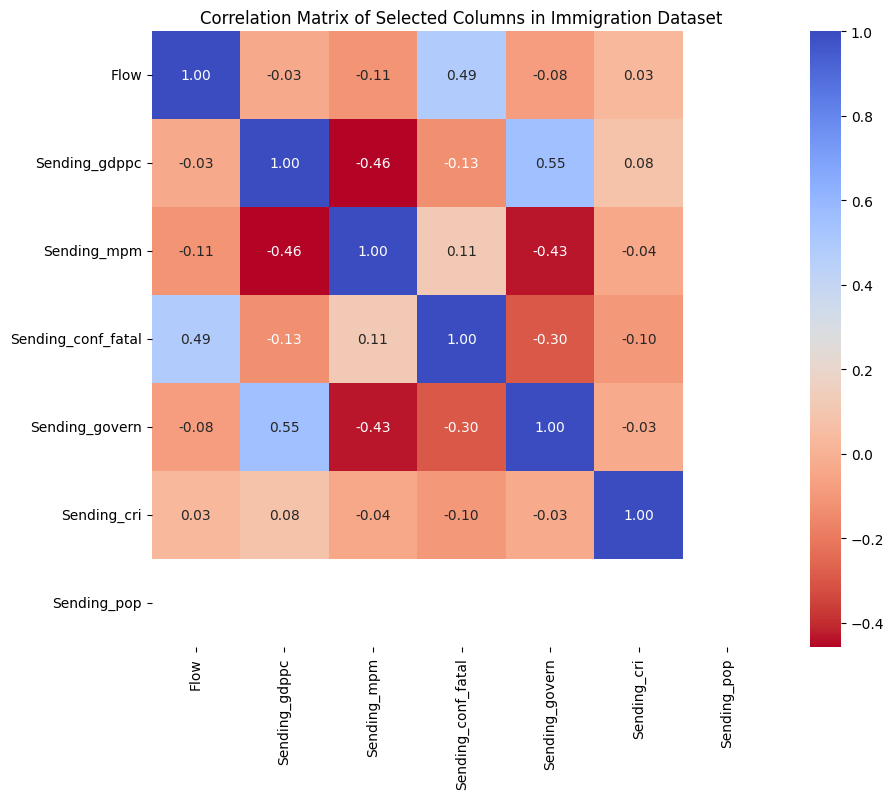

In [ ]:
# Correlation Heatmap

variables = ['Flow', 'Sending_gdppc', 'Sending_mpm', 'Sending_conf_fatal', 'Sending_govern', 'Sending_cri', 'Sending_pop']

# Correlation Matrix
corr_matrix = immigration[variables].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm_r', fmt=".2f")
plt.title('Correlation Matrix of Selected Columns in Immigration Dataset')
plt.show()

The results of the multilinear regression model are outlined below.

To begin, the adjusted R-squared value of 0.251 indicates that our model accounts for 25% of the variation in the outcome variable, which is considered fair but not optimal.

Among the indicator variables, only Sending_mpm (poverty measure) and Sending_conf_fatal (conflict fatalities) have a p-value less than 0.5, indicating that these two variables have a statistically significant effect on the outcome variable. Specifically, an increase of one unit in conflict fatalities leads to a migration increase of 20 individuals to EU countries. Conversely, a one-unit increase in the poverty measure results in a decrease of 496 individuals migrating, contrary to our initial expectation.

In [550]:
# Multilinear Regression Model

# X and Y variables
predictors = ['Sending_gdppc', 'Sending_mpm', 'Sending_conf_fatal', 'Sending_govern', 'Sending_cri']
outcome = 'Flow'

# constant term
X = sm.add_constant(immigration[predictors])

# the regression model
model = sm.OLS(immigration[outcome], X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     12.47
Date:                Sat, 04 May 2024   Prob (F-statistic):           2.80e-10
Time:                        00:16:01   Log-Likelihood:                -2112.6
No. Observations:                 172   AIC:                             4237.
Df Residuals:                     166   BIC:                             4256.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5551.0018   2.62

There are various methods to assess the performance of our model. We will begin by conducting a residual analysis, which involves examining the differences between the actual and predicted y values.

Based on the plots below, our model appears to satisfy the normality and autocorrelation assumptions. However, it is possible that the model may be affected by heteroscedasticity, as the residuals do not appear to be randomly scattered.

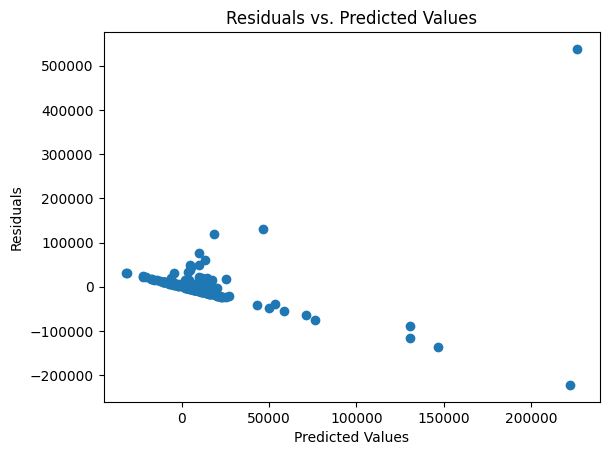

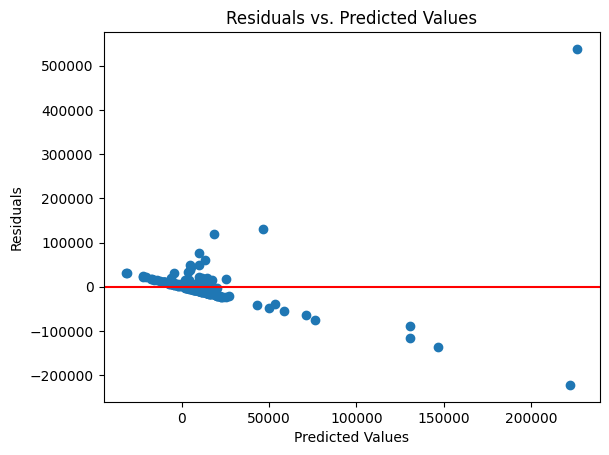

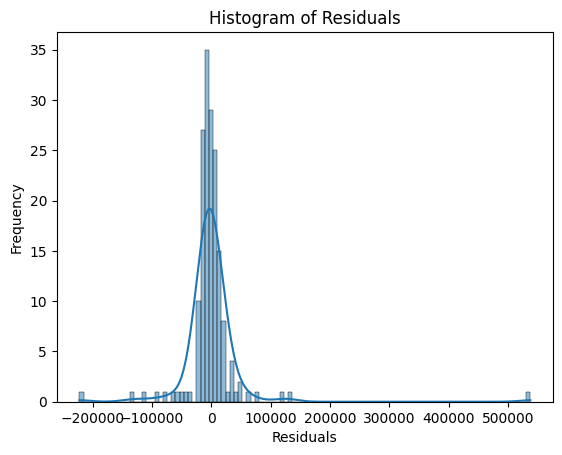

Durbin-Watson Statistic: 1.9701888569180992


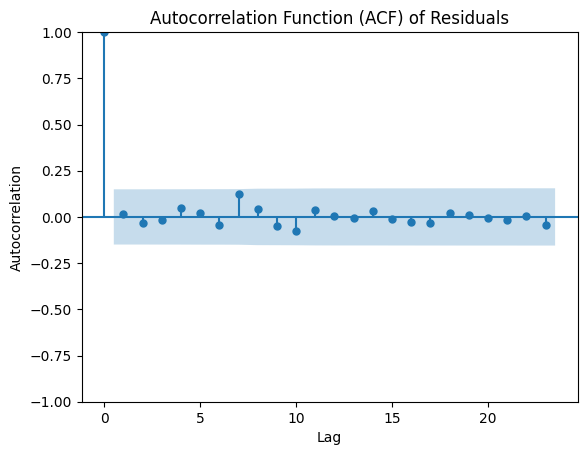

In [556]:
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.stattools as st
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Residuals
predicted_values = results.predict()
residuals = immigration['Flow'] - predicted_values

# Check for Linearity
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Check for Homoscedasticity
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Normality of Residuals
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Check for Autocorrelation
# Durbin-Watson statistic using DurbinWatson function
dw_statistic = st.durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_statistic)

# You can also plot autocorrelation function (ACF) of residuals if needed
sm.graphics.tsa.plot_acf(residuals)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()


## Conclusion

This project aims to investigate migration flows to the EU and the key determinants of these flows.

Initially, in the exploratory analysis, migration flows by sending and receiving countries, as well as by gender and age brackets, were analyzed. The migrants coming to EU countries were evenly split between males and females, with more than half of the arriving migrants considered to be young. Notably, Ukraine emerged as the primary sending country, with its invasion effect significantly shaping migration patterns.

In the subsequent section, this research statistically analyzed the influence of various factors on migration flows, including GDP per capita, poverty, social and armed conflicts, governance, climate risks, and population. The results of the regression analysis highlighted the statistically significant effects of poverty measures and conflict variables on migration flows.

Further, the project aimed to incorporate additional indicators into the migration dataset (immig_noneu27), encompassing socio-economic and political variables such as GDP per capita, the Multidimensional Poverty Measure, Political Stability Indicators, Gender Inequality Index, Conflict Indicators (Battles, Riots, and Violence against Civilians), Climate Risk Index, and Gender Inequality Index.

Subsequently, the project's focus shifted towards constructing a statistical model to forecast migration flows to EU27 countries using these indicators.

For future studies, considerations such as geographical proximity and common language and culture could be operationalized and integrated into the model to enhance its predictive capacity.

